In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('telecom_customer_churn.xlsx')
df.head(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,9,None,Yes,42.39,...,No,Yes,One Year,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,9,None,Yes,10.69,...,Yes,No,Month-to-Month,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,4,Offer E,Yes,33.65,...,No,Yes,Month-to-Month,73.9,280.85,0.00,0,134.60,415.45,Churned


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  6361 non-null   float64
 10  Multiple Lines                     6361 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [4]:
df.describe()

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [5]:
df.isnull().sum().sum()

12046

In [6]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges          

In [7]:
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtype =='int64' or df[i].dtype =='float64':
        num_col.append(i)
    else:
        cat_col.append(i)
print(num_col)
print('****************************')
print(cat_col)

['Age', 'Number of Dependents', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
****************************
['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Customer Status']


In [8]:
for i in df[num_col]:
    df[i].fillna(df[i].mean(), inplace=True)

In [9]:
for i in df[cat_col]:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [10]:
df.isna().sum().sum()

0

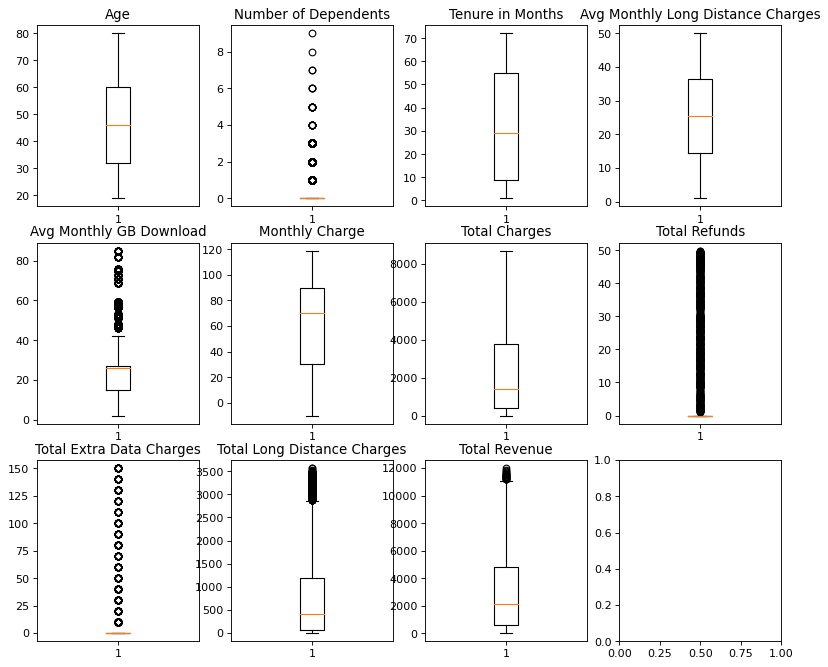

In [11]:
f, ax = plt.subplots(3,4, figsize=(12,10), dpi=80)
index = 0
try:
    for i in range(3):
        for j in range(4):
            ax[i,j].boxplot(df[num_col[index]])
            ax[i,j].set_title(num_col[index])
            index+=1
except:
    pass
plt.show()

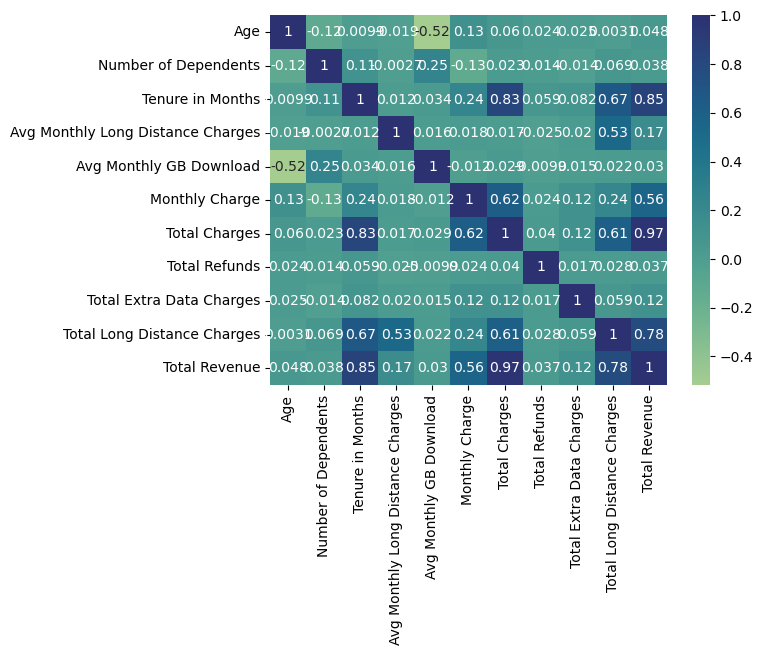

In [12]:
sns.heatmap(df.corr(), annot = True, cbar=True, cmap='crest')
plt.show()

In [13]:
df.head(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,9,None,Yes,42.39,...,No,Yes,One Year,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,9,None,Yes,10.69,...,Yes,No,Month-to-Month,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,4,Offer E,Yes,33.65,...,No,Yes,Month-to-Month,73.9,280.85,0.00,0,134.60,415.45,Churned


In [14]:
df[['Customer Status','Multiple Lines','Offer']].groupby(['Multiple Lines','Offer']).agg([min,max])

Customer Status        
                                   min     max
Multiple Lines Offer                          
No             None            Churned  Stayed
               Offer A         Churned  Stayed
               Offer B         Churned  Stayed
               Offer C         Churned  Stayed
               Offer D         Churned  Stayed
               Offer E         Churned  Stayed
Yes            None            Churned  Stayed
               Offer A         Churned  Stayed
               Offer B         Churned  Stayed
               Offer C         Churned  Stayed
               Offer D         Churned  Stayed
               Offer E         Churned  Stayed

In [15]:
df[['Customer Status','Offer','Total Revenue']].groupby(['Customer Status','Offer']).agg('sum')

Total Revenue
Customer Status Offer                 
Churned         None        2114547.83
                Offer A      304924.05
                Offer B      578015.62
                Offer C      320206.88
                Offer D      246013.76
                Offer E      120751.68
Joined          None          32379.02
                Offer E       21900.73
Stayed          None        9200461.69
                Offer A     3350296.12
                Offer B     3609901.15
                Offer C      824879.99
                Offer D      546053.48
                Offer E      100799.69

In [16]:
df[['Gender','Married','Customer Status']].groupby(['Gender','Married']).agg([min,max])

Customer Status        
                           min     max
Gender Married                        
Female No              Churned  Stayed
       Yes             Churned  Stayed
Male   No              Churned  Stayed
       Yes             Churned  Stayed

In [17]:
df[['Premium Tech Support','Internet Type','Unlimited Data','Total Revenue']].groupby(
['Premium Tech Support','Internet Type','Unlimited Data']).agg('sum')

Total Revenue
Premium Tech Support Internet Type Unlimited Data               
No                   Cable         No                  125533.48
                                   Yes                 630774.50
                     DSL           No                  193822.58
                                   Yes                1298717.08
                     Fiber Optic   No                  989563.61
                                   Yes                8301250.99
Yes                  Cable         No                  171637.12
                                   Yes                1300529.13
                     DSL           No                  462181.64
                                   Yes                2594568.25
                     Fiber Optic   No                  746796.20
                                   Yes                4555757.11

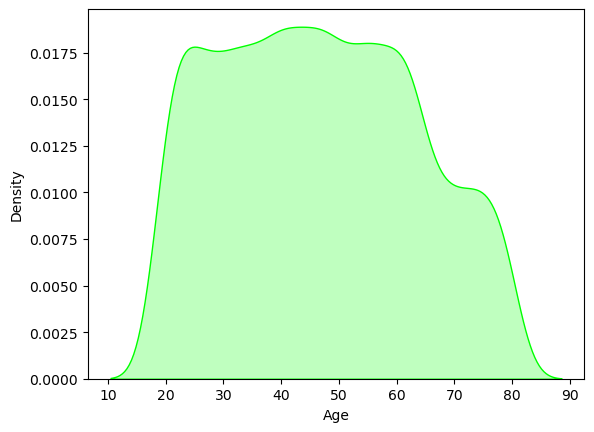

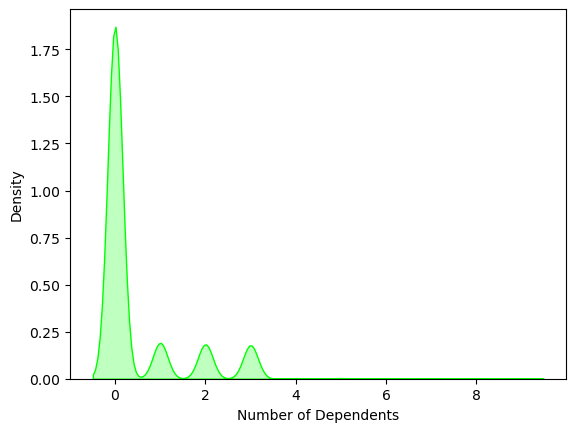

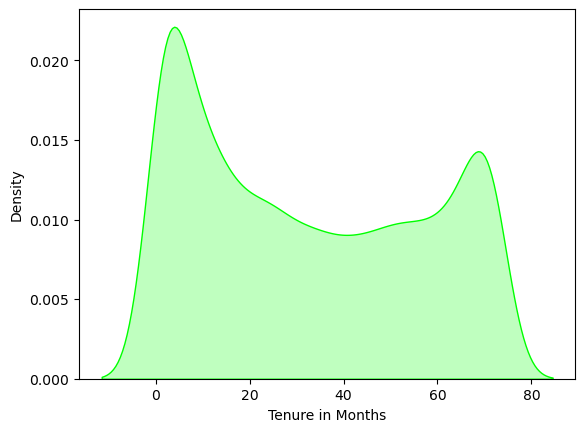

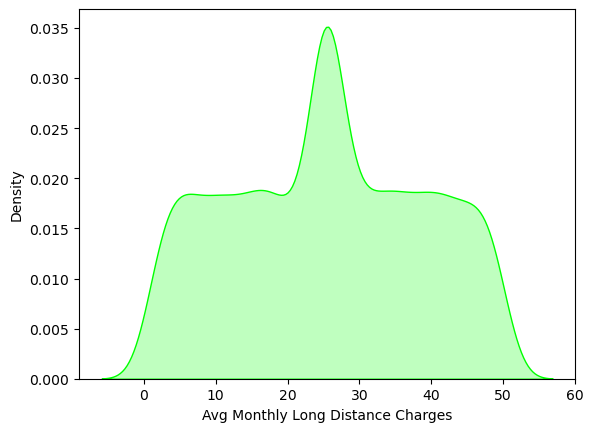

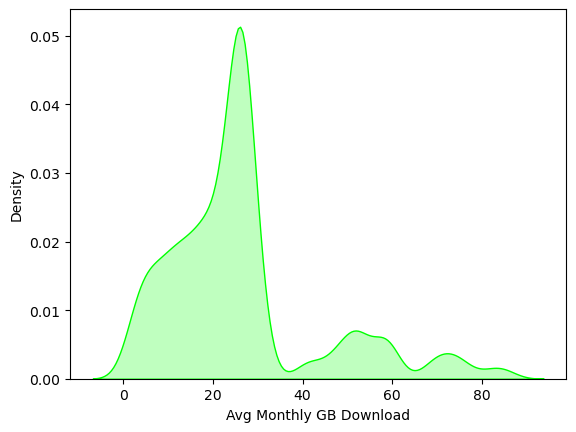

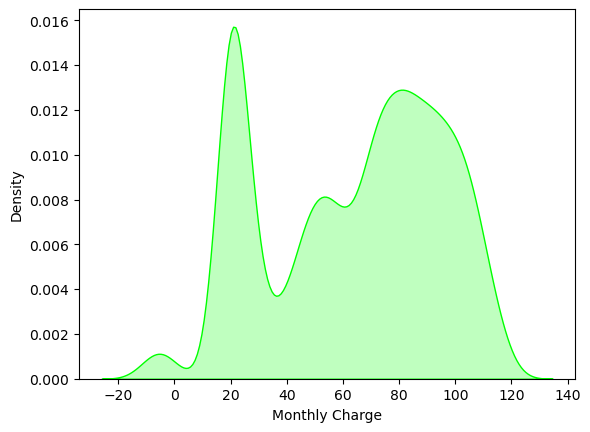

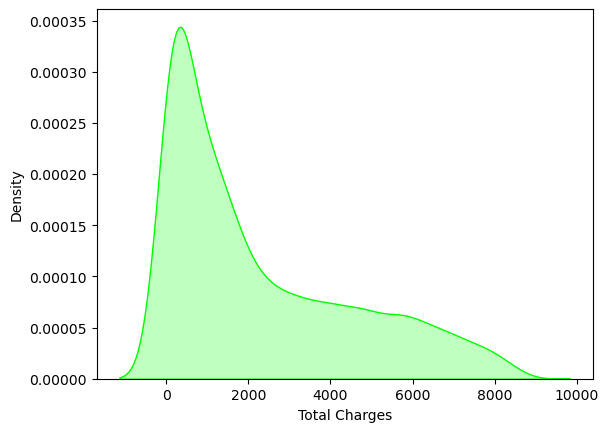

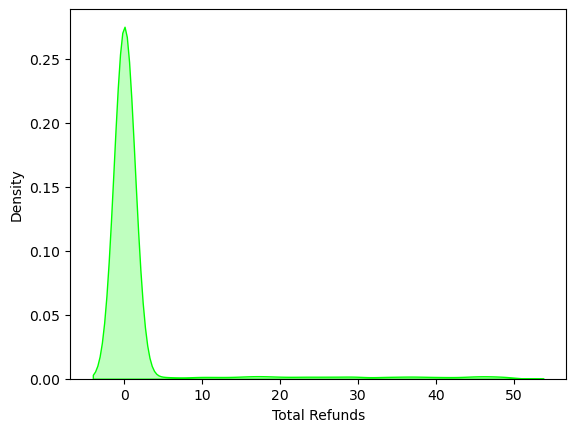

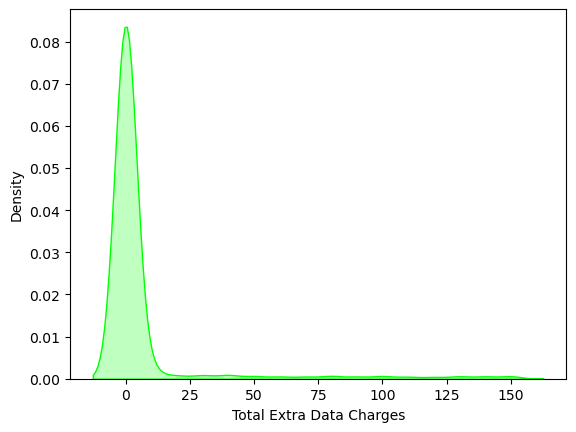

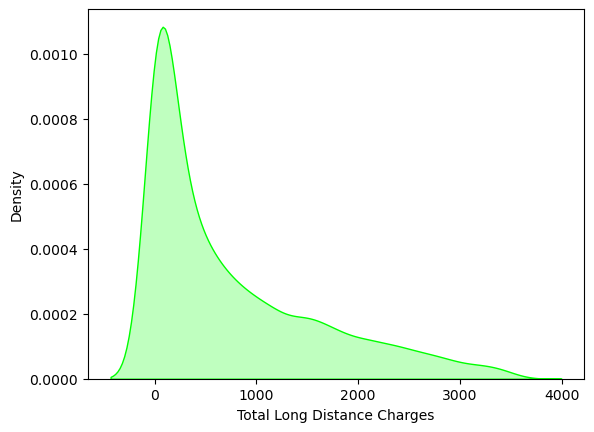

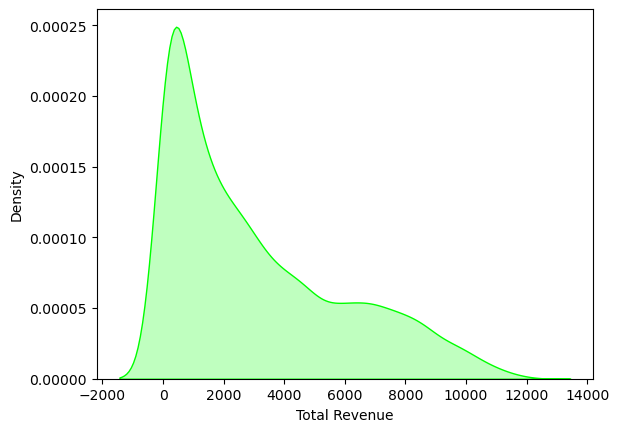

In [18]:
for i in df[num_col]:
    sns.kdeplot(df[i], color='#00FF00',fill=True, palette=True)
    plt.show()

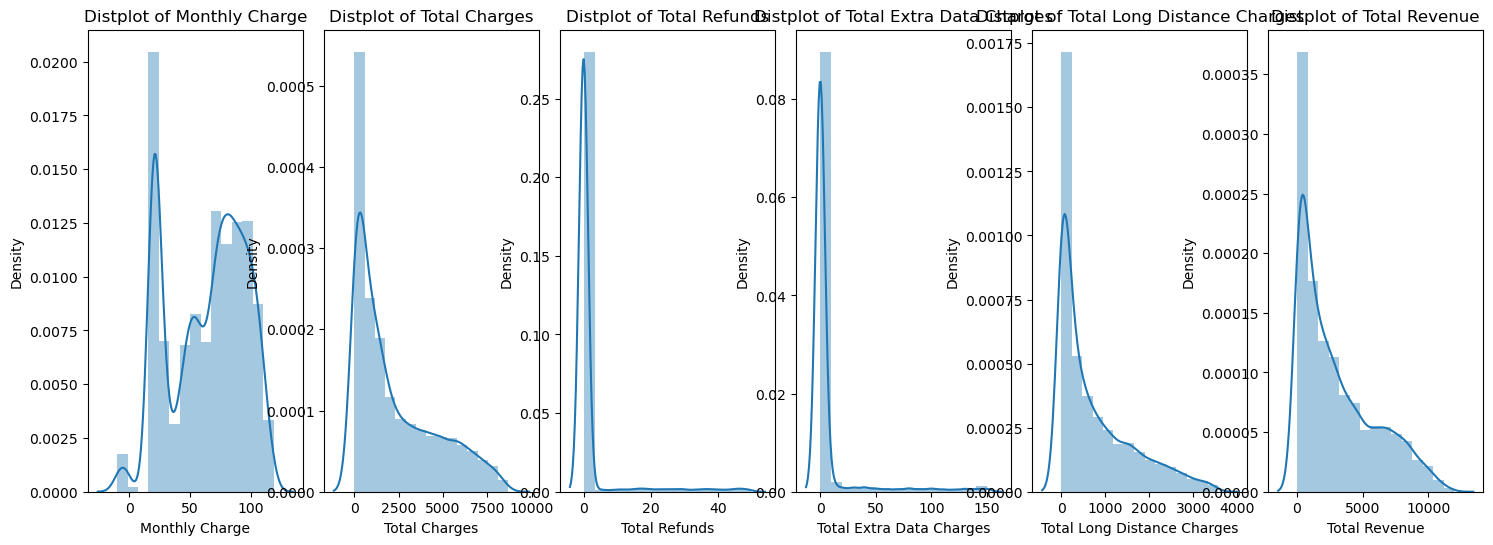

In [19]:
plt.figure(1 , figsize = (18 , 6))
n = 0 
for x in ['Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']:
    n += 1
    plt.subplot(1 , 6 , n)
    plt.subplots_adjust(hspace = 0.1 , wspace = 0.1)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [20]:
a = df.groupby(by='Customer Status').agg(MonthlyCharge=('Monthly Charge','mean'), TotalRefunds=('Total Refunds','mean'), 
                                         TotalCharges=('Total Charges','mean'))
print(a)

                 MonthlyCharge  TotalRefunds  TotalCharges
Customer Status                                           
Churned              73.347592      1.518983   1531.796094
Joined               42.775991      0.238656     79.292731
Stayed               61.737415      2.303458   2788.516831


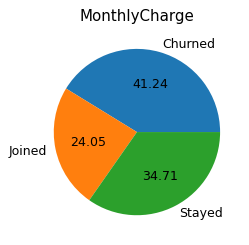

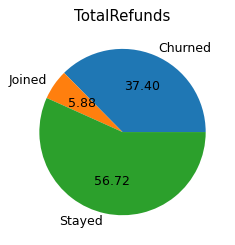

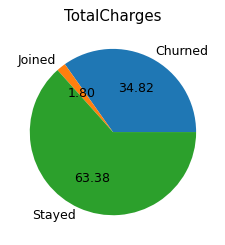

In [21]:
def piechart(m):
    plt.figure(figsize=(3,3), dpi=90)
    plt.pie(labels=m.index, x=m.values, autopct = '%.2f')
    plt.title(m.name)
    plt.show()
    
for i in a:
    piechart(a[i])

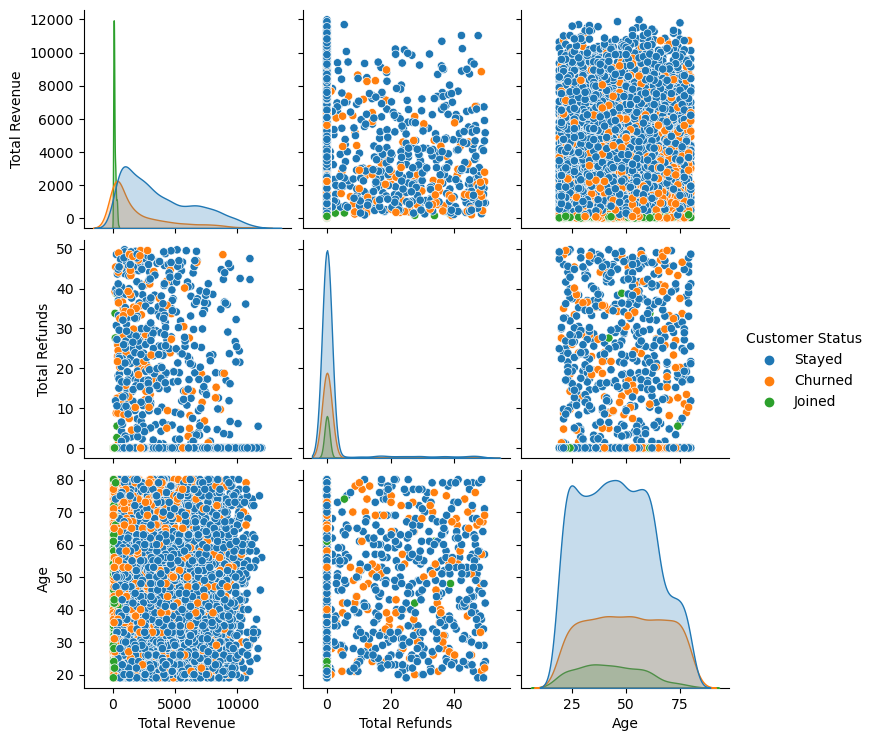

In [22]:
sns.pairplot(df, vars = ['Total Revenue','Total Refunds','Age'], hue = "Customer Status")

In [23]:
print(df.nunique())
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(num_col)

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                50
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Monthly Charge                       1591
Total Charges                        6540
Total Refunds                         500
Total Extra Data Charges          

In [24]:
df1 = df.copy()
df1.head(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,9,None,Yes,42.39,...,No,Yes,One Year,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,9,None,Yes,10.69,...,Yes,No,Month-to-Month,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,4,Offer E,Yes,33.65,...,No,Yes,Month-to-Month,73.9,280.85,0.00,0,134.60,415.45,Churned


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
col = df1[['Gender','Married','Offer','Phone Service','Multiple Lines','Internet Service','Internet Type','Premium Tech Support',
      'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Customer Status']]
for i in col:
    df1[i]=le.fit_transform(df1[i])

In [27]:
df1.head(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,0,37,1,0,Frazier Park,9,0,1,42.39,...,0,1,1,65.6,593.30,0.00,0,381.51,974.81,2
1,0003-MKNFE,1,46,0,0,Glendale,9,0,1,10.69,...,1,0,0,-4.0,542.40,38.33,10,96.21,610.28,2
2,0004-TLHLJ,1,50,0,0,Costa Mesa,4,5,1,33.65,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0


In [28]:
df1 = df1.drop(['City','Customer ID'], axis=1)
df1.head(3)

,Gender,Age,Married,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,9,0,1,42.39,0,1,...,0,1,1,65.6,593.30,0.00,0,381.51,974.81,2
1,1,46,0,0,9,0,1,10.69,1,1,...,1,0,0,-4.0,542.40,38.33,10,96.21,610.28,2
2,1,50,0,0,4,5,1,33.65,0,1,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(k):
    vif = pd.DataFrame()
    vif['Features'] = k.columns
    vif['Values'] = [variance_inflation_factor(k.values, i) for i in range(k.shape[1])]
    return vif

In [30]:
VIF(df1)

,Features,Values
0,Gender,2.008149
1,Age,12.363748
2,Married,2.519302
3,Number of Dependents,1.554450
4,Tenure in Months,19.159069
5,Offer,1.750106
6,Phone Service,16.044522
7,Avg Monthly Long Distance Charges,9.333973
8,Multiple Lines,2.576190
9,Internet Service,20.238707


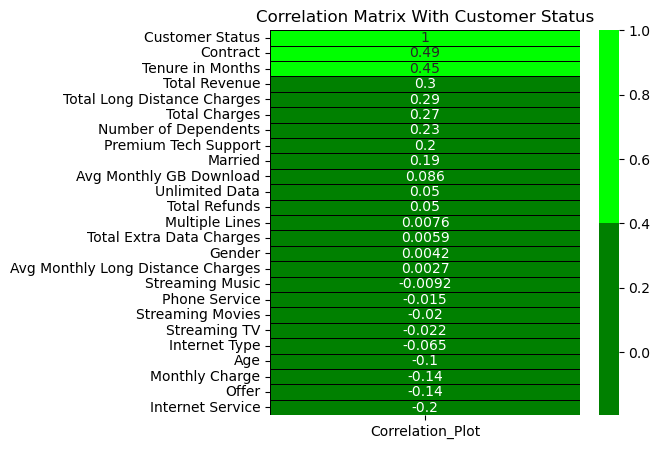

In [31]:
colors = ['#008000', '#00FF00']
corr = df1.corrwith(df1['Customer Status']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation_Plot']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix With Customer Status")
plt.show()

In [32]:
df2 = df.copy()
df2.head(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,9,None,Yes,42.39,...,No,Yes,One Year,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,9,None,Yes,10.69,...,Yes,No,Month-to-Month,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,4,Offer E,Yes,33.65,...,No,Yes,Month-to-Month,73.9,280.85,0.00,0,134.60,415.45,Churned


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
col = df2[['Gender','Married','Offer','Phone Service','Multiple Lines','Internet Service','Internet Type','Premium Tech Support',
      'Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract']]
for i in col:
    df2[i]=le.fit_transform(df2[i])

In [35]:
df2.head(3)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,0,37,1,0,Frazier Park,9,0,1,42.39,...,0,1,1,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,1,46,0,0,Glendale,9,0,1,10.69,...,1,0,0,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,1,50,0,0,Costa Mesa,4,5,1,33.65,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,Churned


In [36]:
x = df2.drop(['Customer ID','City','Customer Status'], axis=1)
y = df2['Customer Status']

In [37]:
print(x.shape)
print(y.shape)
print('---------------------')
print(y.value_counts())

(7043, 24)
(7043,)
---------------------
Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64


In [38]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [39]:
column = x.columns
column

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [40]:
x = SS.fit_transform(x)
x = pd.DataFrame(data=x, columns=column)
x.head(3)

,Gender,Age,Married,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,-1.009559,-0.567773,1.034530,-0.486835,-0.952994,-0.764620,0.327438,1.257532,-0.854176,0.525927,...,-0.796070,-0.739062,0.350865,0.289021,0.064221,-0.744500,-0.248313,-0.273300,-0.434195,-0.718872
1,0.990532,-0.030433,-0.966622,-0.486835,-0.952994,-0.764620,0.327438,-1.091613,1.170719,0.525927,...,1.256171,1.353066,-2.850098,-0.889657,-2.166367,-0.766962,4.602325,0.125055,-0.771190,-0.846108
2,0.990532,0.208385,-0.966622,-0.486835,-1.156740,1.970105,0.327438,0.609850,-0.854176,0.525927,...,-0.796070,-0.739062,0.350865,-0.889657,0.330225,-0.882382,-0.248313,-0.273300,-0.725844,-0.914111


In [41]:
print(x.shape)
print(y.shape)

(7043, 24)
(7043,)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5634, 24)
(5634,)
(1409, 24)
(1409,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [46]:
print(y_pred_train)
print('---------------------------')
print(y_pred_test)

['Stayed' 'Churned' 'Stayed' ... 'Stayed' 'Stayed' 'Stayed']
---------------------------
['Stayed' 'Stayed' 'Churned' ... 'Stayed' 'Stayed' 'Stayed']


In [47]:
from sklearn.metrics import accuracy_score
print('Model accuracy score for train: {:.3f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy score for test: {:.3f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score for train: 0.850
Model accuracy score for test: 0.747


In [48]:
y = le.fit_transform(y)
print(y)
print(y.shape)

[2 2 0 ... 1 2 2]
(7043,)


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=65)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4930, 24)
(4930,)
(2113, 24)
(2113,)


In [51]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
y_pred_train_xgb = XGB.predict(x_train)
y_pred_test_xgb = XGB.predict(x_test)

In [54]:
print(accuracy_score(y_train, y_pred_train_xgb))
print('-------------------')
print(accuracy_score(y_test, y_pred_test_xgb))

0.9979716024340771
-------------------
0.8154283009938476


In [ ]:
# np.where(df["Weight"]==0)

In [ ]:
# df["Weight"] = np.where(df["Weight"]==0,df["Weight"].mean(),df["Weight"])
# df.head()